### Greenhouse gas Emission prediction project

In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
#load the dataset
excel_file = r"C:\Users\LENOVO\OneDrive\SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx"
years = range(2010, 2017)


In [3]:
years[0]

2010

In [4]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [5]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [6]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [7]:
all_data[0]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.006,0.000,0.006,NaN,4,3,1,5,1,Industry,2010
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2010
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2010
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2010


In [8]:
len(all_data)

7

In [83]:
df.head(4)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,1,0.398,0.073,0.470,4,3,1,4,1,0
1,1,1,0.001,0.001,0.002,4,3,1,1,1,0
2,2,1,0.002,0.000,0.002,4,3,1,4,1,0
3,3,0,0.002,0.000,0.002,3,3,1,3,1,0


In [13]:
#combining data 
df = pd.concat(all_data, ignore_index=True)
df.head(10)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
5,1111B0,"Fresh wheat, corn, rice, and other grains",methane,"kg/2018 USD, purchaser price",0.008,0.001,0.009,NaN,2,3,1,1,1,Commodity,2010
6,1111B0,"Fresh wheat, corn, rice, and other grains",nitrous oxide,"kg/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,3,1,4,1,Commodity,2010
7,1111B0,"Fresh wheat, corn, rice, and other grains",other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,3,1,3,1,Commodity,2010
8,111200,"Fresh vegetables, melons, and potatoes",carbon dioxide,"kg/2018 USD, purchaser price",0.183,0.132,0.315,NaN,3,3,1,4,1,Commodity,2010
9,111200,"Fresh vegetables, melons, and potatoes",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010


In [14]:

df.columns 

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [15]:
#Remove null values
df.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

In [16]:
#week 2
#this is empty column thats why drop it
df.drop(columns=['Unnamed: 7'],inplace=True)

In [17]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [20]:
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

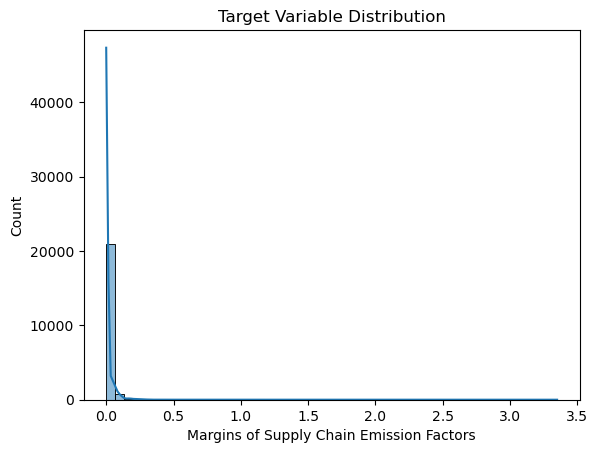

In [21]:
#EDA

sns.histplot(df['Margins of Supply Chain Emission Factors'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [22]:
#coverting categorical to numerical
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [23]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [24]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Unit'] = le.fit_transform(df['Unit'])
df['Source'] = le.fit_transform(df['Source'])
df['Substance'] = le.fit_transform(df['Substance'])

In [26]:
print(df['Source'].unique())

[0 1]


In [27]:
print(df['Substance'].unique())

[0 1 2 3]


In [28]:
print(df['Unit'].unique())

[1 0]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int32  
 3   Unit                                                    22092 non-null  int32  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [30]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [31]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [32]:
len(df.Name.unique())

713

In [33]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values('Supply Chain Emission Factors with Margins', ascending=False).head(10) 
top_emitters = top_emitters.reset_index()

In [34]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


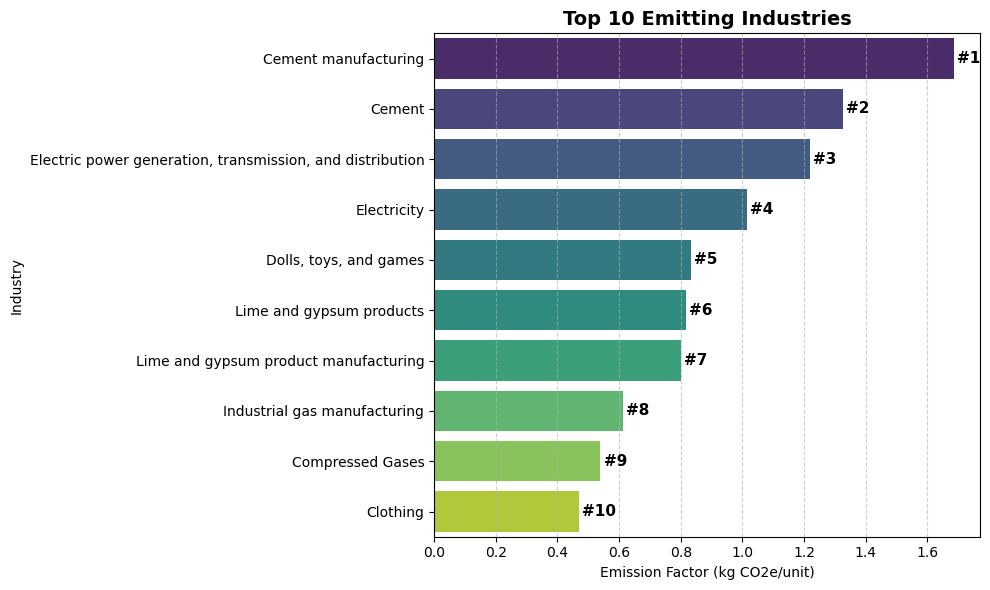

In [35]:
plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot 
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

In [36]:
df.drop(columns=['Name','Code','Year'], inplace=True) 

In [37]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,1,0.398,0.073,0.47,4,3,1,4,1,0


In [38]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [39]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # Feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable 

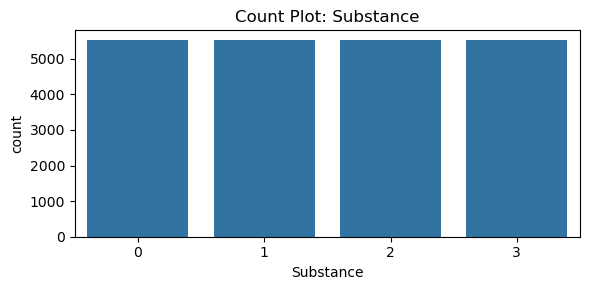

In [40]:
#Univariate Analysis
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

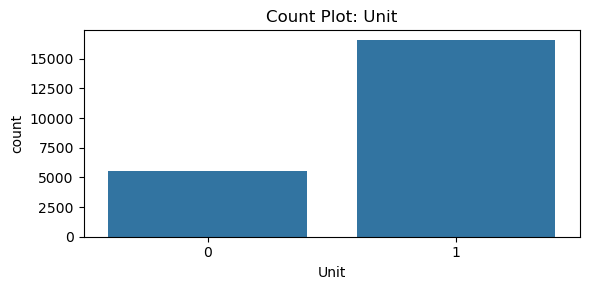

In [41]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

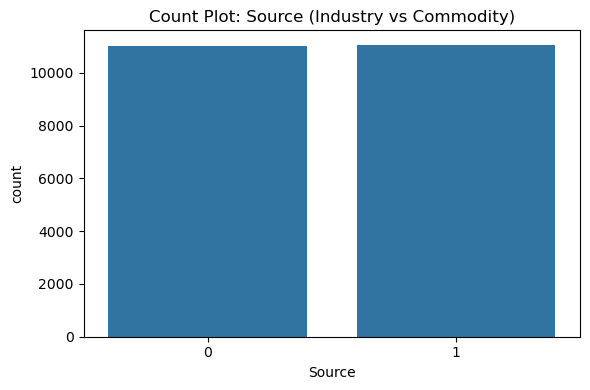

In [42]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [43]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [44]:
#multivariate analysis
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,-7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,-7.745967e-01,1.000000e+00,0.155859,0.094300,0.169741,0.025159,-3.757415e-15,NaN,-0.286990,NaN,1.644193e-16
Supply Chain Emission Factors without Margins,-3.918505e-01,1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.757415e-15,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,-2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


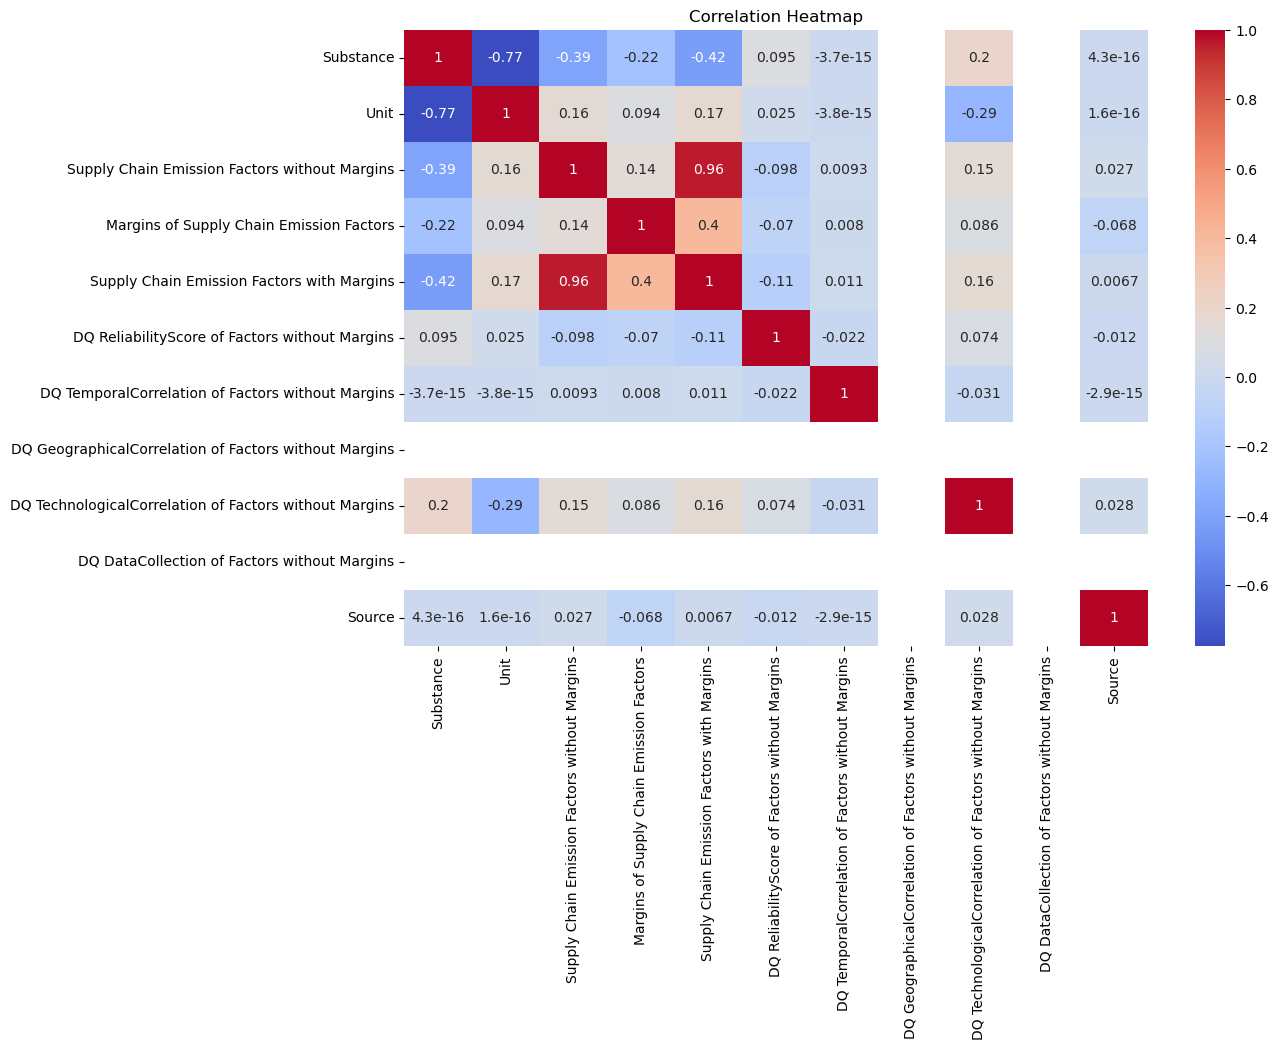

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### Normallize features

In [62]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.750000,0.433023,0.0,0.75,1.000,1.000,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.00,1.000,1.000,1.000


In [63]:
#Normallize features
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
X_scaled[0].min(),X_scaled[0].max()

(-1.3416407864998738, 1.3849614361966767)

In [65]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

(-0.0, 1.0)

#### Divide the data into train and test

In [66]:
X.shape

(22092, 10)

In [70]:
#splitting data into train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape

(17673, 10)

In [72]:
X_test.shape

(4419, 10)

#### Select model for training

In [73]:
#initiallize random forest regressor
RF_model = RandomForestRegressor(random_state=42)

#### Training

In [74]:
#fitting the model on training data
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### prediction and evaluation

In [75]:
#making prediction on the test set
RF_y_pred = RF_model.predict(X_test)

In [76]:
RF_y_pred[:20]

array([2.92960000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94110000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15790000e-01, 9.00000000e-03, 0.00000000e+00])

In [78]:
#calculate mean squared error
RF_mse = mean_squared_error(y_test, RF_y_pred) 
RF_rmse = np.sqrt(RF_mse) 
# Calculating R² score
RF_r2 = r2_score(y_test, RF_y_pred)

print(f'RMSE: {RF_rmse}')
print(f'R² Score: {RF_r2}')

RMSE: 0.006114498725349979
R² Score: 0.9993344007291529


In [79]:
#import linear regression model
from sklearn.linear_model import LinearRegression  
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test)


LR_mse = mean_squared_error(y_test, LR_y_pred) 
LR_rmse = np.sqrt(LR_mse)  
LR_r2 = r2_score(y_test, LR_y_pred)  

print(f'RMSE: {LR_rmse}')
print(f'R² Score: {LR_r2}')


RMSE: 0.00028073792916294876
R² Score: 0.9999985968848819


#### Hyperparameter tuning

In [80]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
!mkdir models 

A subdirectory or file models already exists.


In [82]:
 # Save the best model
joblib.dump(best_model, 'models/LR_model.pkl')    
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']